In [ ]:
!pip install tensorflow pydot graphviz

In [1]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_regression
from matplotlib import pyplot as plt
from sklearn import set_config

In [3]:
set_config(transform_output='pandas')

In [5]:
x, y = make_regression(n_features=50, n_samples=10000, noise=5) 
x_c, y_c = make_classification(n_features=70, n_samples=50000, n_informative=7)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=999)
xc_train, xc_test, yc_train, yc_test = train_test_split(x_c, y_c, test_size=0.3, random_state=999)

## This Notebook Aims to Include Tensorflow related Training
## Not realted to Solve the Problem

### Importing Tensorflow Libary and Checking the Version

## Creating the Model

In [11]:
from tensorflow.keras.models import Sequential
# Is responsbile for combining the Layers
from tensorflow.keras.layers import InputLayer, Dense
# InputLayer => for Inputs (Optional)
# Dense => Hidden layer (Fully connected Layer)

In [12]:
x_train.shape

(7000, 50)

In [23]:
from tensorflow.keras.losses import mean_squared_error

In [24]:
model = Sequential()
model.add(Input(shape=(50,)))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=20, activation='softplus'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss=mean_squared_error, optimizer='sgd', \
             metrics=[mean_squared_error])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                1530      
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2171 (8.48 KB)
Trainable params: 2171 (8.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
from tensorflow.keras.utils import plot_model

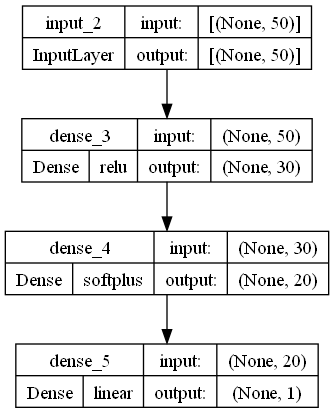

In [27]:
plot_model(model, show_shapes=True,show_layer_activations=True)

In [28]:
model.fit(x_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
110/110 [==============================] - 1s 6ms/step - loss: 1025471.0000 - mean_squared_error: 1025471.0000
Epoch 2/10
110/110 [==============================] - 1s 8ms/step - loss: 39557.6953 - mean_squared_error: 39557.6953
Epoch 3/10
110/110 [==============================] - 1s 5ms/step - loss: 39520.7031 - mean_squared_error: 39520.7031
Epoch 4/10
110/110 [==============================] - 1s 7ms/step - loss: 39523.5117 - mean_squared_error: 39523.5117
Epoch 5/10
110/110 [==============================] - 1s 5ms/step - loss: 39522.6836 - mean_squared_error: 39522.6836
Epoch 6/10
110/110 [==============================] - 1s 5ms/step - loss: 39518.7031 - mean_squared_error: 39518.7031
Epoch 7/10
110/110 [==============================] - 1s 5ms/step - loss: 39522.9727 - mean_squared_error: 39522.9727
Epoch 8/10
110/110 [==============================] - 1s 8ms/step - loss: 39508.6484 - mean_squared_error: 39508.6484
Epoch 9/10
110/110 [==============================] 

In [29]:
## Let's say that I want to train 10 epochs today, I want to train remaining tomorrow
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
219/219 [==============================] - 3s 12ms/step - loss: 39519.4805 - mean_squared_error: 39519.4805
Epoch 2/10
219/219 [==============================] - 2s 10ms/step - loss: 39536.1328 - mean_squared_error: 39536.1328
Epoch 3/10
219/219 [==============================] - 2s 7ms/step - loss: 39530.2266 - mean_squared_error: 39530.2266
Epoch 4/10
219/219 [==============================] - 1s 7ms/step - loss: 39528.9727 - mean_squared_error: 39528.9727
Epoch 5/10
219/219 [==============================] - 2s 8ms/step - loss: 39522.6250 - mean_squared_error: 39522.6250
Epoch 6/10
219/219 [==============================] - 1s 6ms/step - loss: 39531.5156 - mean_squared_error: 39531.5156
Epoch 7/10
219/219 [==============================] - 2s 9ms/step - loss: 39519.3789 - mean_squared_error: 39519.3789
Epoch 8/10
219/219 [==============================] - 2s 11ms/step - loss: 39527.9258 - mean_squared_error: 39527.9258
Epoch 9/10
219/219 [==============================] -

In [30]:
model.fit(x_train, y_train, epochs=20, initial_epoch=10)

Epoch 11/20
219/219 [==============================] - 1s 5ms/step - loss: 39532.3164 - mean_squared_error: 39532.3164
Epoch 12/20
219/219 [==============================] - 1s 6ms/step - loss: 39528.0352 - mean_squared_error: 39528.0352
Epoch 13/20
219/219 [==============================] - 1s 5ms/step - loss: 39531.7422 - mean_squared_error: 39531.7422
Epoch 14/20
219/219 [==============================] - 1s 5ms/step - loss: 39528.4727 - mean_squared_error: 39528.4727
Epoch 15/20
219/219 [==============================] - 1s 5ms/step - loss: 39527.0391 - mean_squared_error: 39527.0391
Epoch 16/20
219/219 [==============================] - 1s 5ms/step - loss: 39524.7695 - mean_squared_error: 39524.7695
Epoch 17/20
219/219 [==============================] - 2s 8ms/step - loss: 39524.9297 - mean_squared_error: 39524.9297
Epoch 18/20
219/219 [==============================] - 2s 7ms/step - loss: 39531.0859 - mean_squared_error: 39531.0859
Epoch 19/20
219/219 [===========================

In [31]:
history = model.fit(x_train, y_train, epochs=25, initial_epoch=20)

Epoch 21/25
219/219 [==============================] - 1s 5ms/step - loss: 39528.3516 - mean_squared_error: 39528.3516
Epoch 22/25
219/219 [==============================] - 1s 7ms/step - loss: 39497.2695 - mean_squared_error: 39497.2695
Epoch 23/25
219/219 [==============================] - 1s 5ms/step - loss: 39533.4609 - mean_squared_error: 39533.4609
Epoch 24/25
219/219 [==============================] - 1s 5ms/step - loss: 39526.7344 - mean_squared_error: 39526.7344
Epoch 25/25
219/219 [==============================] - 2s 7ms/step - loss: 39518.8516 - mean_squared_error: 39518.8516


In [38]:
print(history.history['loss'])
print(history.history['mean_squared_error'])

[39528.3515625, 39497.26953125, 39533.4609375, 39526.734375, 39518.8515625]
[39528.3515625, 39497.26953125, 39533.4609375, 39526.734375, 39518.8515625]


In [39]:
model = Sequential()
#model.add(Input(shape=(50,)))
model.add(Dense(units=30, input_dim=50, activation='relu'))
model.add(Dense(units=20, activation='softplus'))
model.add(Dense(units=1, activation='linear'))
model.compile(loss=mean_squared_error, optimizer='sgd', \
             metrics=[mean_squared_error])

In [40]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
219/219 [==============================] - 2s 5ms/step - loss: 2139578358038528.0000 - mean_squared_error: 2139578358038528.0000
Epoch 2/5
219/219 [==============================] - 2s 8ms/step - loss: 3132050944.0000 - mean_squared_error: 3132050944.0000
Epoch 3/5
219/219 [==============================] - 1s 4ms/step - loss: 490473.8438 - mean_squared_error: 490473.8438
Epoch 4/5
219/219 [==============================] - 1s 5ms/step - loss: 39628.6445 - mean_squared_error: 39628.6445
Epoch 5/5
219/219 [==============================] - 1s 6ms/step - loss: 39531.5664 - mean_squared_error: 39531.5664


In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                1530      
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2171 (8.48 KB)
Trainable params: 2171 (8.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


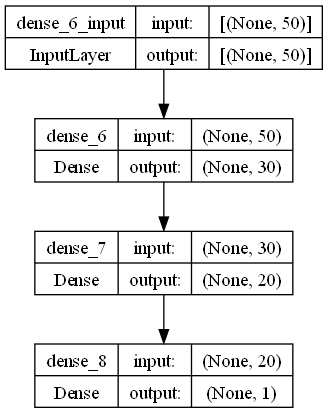

In [43]:
plot_model(model, show_shapes=True)

In [44]:
## Save Model
model.save("FirstNNmodel.h5")

In [45]:
# Load the Model
from tensorflow.keras.models import load_model

In [46]:
model1 = load_model("FirstNNmodel.h5")

In [47]:
## Predict
model1.predict(x_test)

94/94 [==============================] - 1s 4ms/step


array([[-0.9963213],
       [-0.9963213],
       [-0.9963213],
       ...,
       [-0.9963213],
       [-0.9963213],
       [-0.9963213]], dtype=float32)

In [49]:
## Evaluate the Model
model1.evaluate(x_test, y_test, verbose=0)
# First is loss, second one is metric

[39951.53515625, 39951.53515625]

In [2]:
## Lets Create basic Model First

# Sequential => Will add multiple Layers together. 
from tensorflow.keras.models import Sequential
# Dense => Will create a Fully connected Layer
from tensorflow.keras.layers import Dense

In [10]:
x_train.shape

(209673, 7)

In [11]:
# One Can Follow Two ways to create Feed Forward Neural Networks 

# First Way => Create Model, add Layer by Layer
model = Sequential() # Create object for adding layers sequentially =
model.add(Dense(5, input_dim=7, activation='relu')) # => Add Layers => First Layer Would be input layer. as the input contains 7 columns,
# Number of neurons in input layer should be = 7. 5 Being the Number of outputs coming out of Each input neuron 
model.add(Dense(3, activation='softplus')) # Adding Another Layer with softplus activation function
model.add(Dense(1, activation='sigmoid')) # Output Layer with sigmoid as activation function for binary Classification
          

In [12]:
model.summary() # To Check the Model 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [9]:
# If Needed to display in Diagram
from tensorflow.keras.utils import plot_model
# Needed pydot and graphviz needed to be installed to display
# pip install pydot graphviz

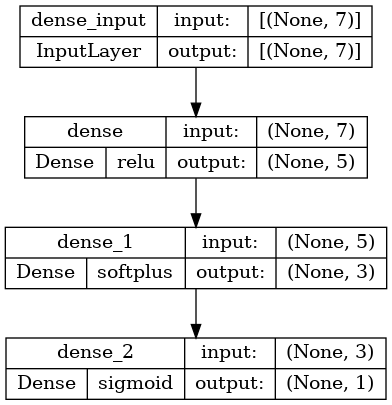

In [14]:
plot_model(model, show_shapes=True, show_layer_activations=True)

In [15]:
## Compiling the Model
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [16]:
# Training the Model
history = model.fit(x_train_processed, y_train, epochs=10)

Epoch 1/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0771 - accuracy: 0.9669
Epoch 2/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0232 - accuracy: 0.9935
Epoch 3/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0224 - accuracy: 0.9935
Epoch 4/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0223 - accuracy: 0.9935
Epoch 5/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 6/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0221 - accuracy: 0.9935
Epoch 7/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0216 - accuracy: 0.9935
Epoch 8/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0207 - accuracy: 0.9935
Epoch 9/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0194 - accuracy: 0.9935
Epoch 10/10
6553/6553 [==============================] - 9s 1ms/step - loss: 0.017

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

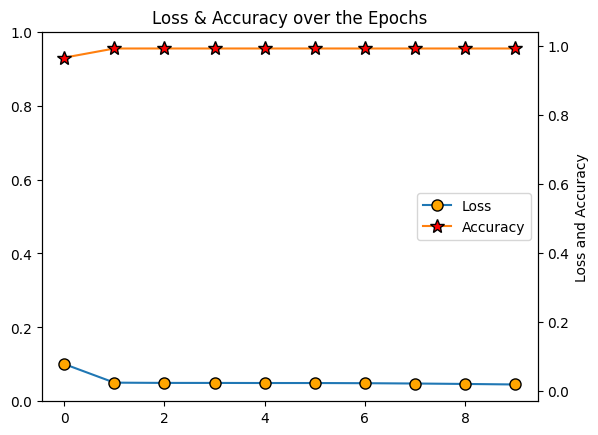

In [18]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax2.plot(history.history['loss'], label='Loss', marker='o', mec='k', ms=8, mfc='orange')
ax2.plot(history.history['accuracy'], label='Accuracy', marker='*', ms=10, mec='k', mfc='red')
#plt.grid()
plt.legend()
plt.ylabel("Loss and Accuracy")
plt.title("Loss & Accuracy over the Epochs")
plt.show()

In [19]:
#  Evaluating on test data
model.evaluate(x_test_processed, y_test)

2809/2809 [==============================] - 3s 1ms/step - loss: 0.0391 - accuracy: 0.9921


[0.03907701000571251, 0.9920544028282166]

In [20]:
## Predict the Result
y_pred = model.predict(x_test_processed)

2809/2809 [==============================] - 3s 929us/step


In [10]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     64495
           1       0.99      0.98      0.99     25366

    accuracy                           0.99     89861
   macro avg       0.99      0.99      0.99     89861
weighted avg       0.99      0.99      0.99     89861



## Saving and loading the Model

In [23]:
import os
if not os.path.isdir("SavedModels"):
    os.mkdir("SavedModels")
if not os.path.isdir("TaxiFare"):
    os.mkdir("TaxiFare")

In [24]:
# saving the Entire Tensorflow model
model.save("SavedModels/TaxiFare/model_2606.h5")

In [25]:
# Loading the Model
model_loaded = tf.keras.models.load_model("SavedModels/TaxiFare/model_2606.h5")

In [26]:
model_loaded.evaluate(x_test_processed, y_test)

2809/2809 [==============================] - 3s 1ms/step - loss: 0.0391 - accuracy: 0.9921


[0.03907701000571251, 0.9920544028282166]

#### Saving Only weights and Saving during/after training the model only

In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
checkpoint_cb = ModelCheckpoint(filepath="SavedModels/TaxiFare", save_weights_only=True, verbose=1)

In [29]:
history = model.fit(x_train_processed, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
6517/6553 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9926
Epoch 1: saving model to SavedModels/TaxiFare
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0168 - accuracy: 0.9926
Epoch 2/10
6549/6553 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9933
Epoch 2: saving model to SavedModels/TaxiFare
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0160 - accuracy: 0.9933
Epoch 3/10
6523/6553 [============================>.] - ETA: 0s - loss: 0.0155 - accuracy: 0.9950
Epoch 3: saving model to SavedModels/TaxiFare
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 4/10
6543/6553 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9957
Epoch 4: saving model to SavedModels/TaxiFare
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0152 - accuracy: 0.9957
Epoch 5/10
6547/6553 [============================>.] - ETA:

In [30]:
os.listdir("SavedModels")

['TaxiFare.data-00000-of-00001',
 'TaxiFare-0002.ckpt.data-00000-of-00001',
 'TaxiFare-0012.ckpt.index',
 'TaxiFare-0004.ckpt.data-00000-of-00001',
 'TaxiFare-0015.ckpt.index',
 'TaxiFare.index',
 'TaxiFare-0001.ckpt.data-00000-of-00001',
 'TaxiFare-0003.ckpt.data-00000-of-00001',
 'TaxiFare-0007.ckpt.data-00000-of-00001',
 'TaxiFare-0010.ckpt.index',
 'TaxiFare-0007.ckpt.index',
 'TaxiFare-0006.ckpt.index',
 'TaxiFare-0013.ckpt.data-00000-of-00001',
 'TaxiFare',
 'TaxiFare-0005.ckpt.data-00000-of-00001',
 'TaxiFare-0008.ckpt.data-00000-of-00001',
 'TaxiFare-0004.ckpt.index',
 'TaxiFare-0008.ckpt.index',
 'TaxiFare-0016.ckpt.data-00000-of-00001',
 'TaxiFare-0005.ckpt.index',
 'TaxiFare-0014.ckpt.index',
 'TaxiFare-0010.ckpt.data-00000-of-00001',
 'TaxiFare-0011.ckpt.data-00000-of-00001',
 'TaxiFare-0006.ckpt.data-00000-of-00001',
 'TaxiFare-0015.ckpt.data-00000-of-00001',
 'TaxiFare-0011.ckpt.index',
 'TaxiFare-0002.ckpt.index',
 'TaxiFare-0013.ckpt.index',
 'TaxiFare-0000.ckpt.data-00

In [31]:
## Load the Weights Back from Checkpoint back

# For this => Create Same Model with exact architecture, and load weights

# One can use same variable to reload, but lets create new one instead
saved_weights_model = Sequential()
saved_weights_model.add(Dense(5, input_dim=7, activation='relu'))
saved_weights_model.add(Dense(3, activation='softplus'))
saved_weights_model.add(Dense(1, activation='sigmoid'))
saved_weights_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

saved_weights_model.load_weights("SavedModels/TaxiFare")

In [32]:
# Evaluating with Model which was retrieved from the Saved Loaded Weights
saved_weights_model.evaluate(x_test_processed, y_test)

2809/2809 [==============================] - 3s 1ms/step - loss: 0.0963 - accuracy: 0.9919


[0.09628888964653015, 0.9918763637542725]

## Activation Functions

In [13]:
from tensorflow.keras.layers import LeakyReLU, PReLU

In [34]:
## Trying Different Activation Functions via Second Way
# Instead of Adding, One can use Sequential with list of Tuples
l_relu = LeakyReLU(alpha=0.01)
p_relu = PReLU()
new_model = Sequential([Dense(5, input_dim=7, activation='relu'),\
                       Dense(3,  activation=l_relu),\
                       Dense(3, activation=p_relu),\
                       Dense(2, activation='elu'),\
                       Dense(2, activation='selu'),\
                       Dense(2, activation='softplus'),\
                       Dense(1, activation='tanh'),\
                       Dense(1, activation='sigmoid')])
new_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])

In [35]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 40        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
 dense_9 (Dense)             (None, 2)                 8         
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [36]:
new_model.fit(x_train_processed, y_train, batch_size=32, epochs=10)

Epoch 1/10
6553/6553 [==============================] - 12s 2ms/step - loss: 0.1309 - accuracy: 0.9779
Epoch 2/10
6553/6553 [==============================] - 10s 2ms/step - loss: 0.0268 - accuracy: 0.9932
Epoch 3/10
6553/6553 [==============================] - 10s 2ms/step - loss: 0.0242 - accuracy: 0.9933
Epoch 4/10
6553/6553 [==============================] - 11s 2ms/step - loss: 0.0235 - accuracy: 0.9933
Epoch 5/10
6553/6553 [==============================] - 11s 2ms/step - loss: 0.0230 - accuracy: 0.9934
Epoch 6/10
6553/6553 [==============================] - 11s 2ms/step - loss: 0.0227 - accuracy: 0.9934
Epoch 7/10
6553/6553 [==============================] - 10s 2ms/step - loss: 0.0232 - accuracy: 0.9934
Epoch 8/10
6553/6553 [==============================] - 10s 2ms/step - loss: 0.0226 - accuracy: 0.9934
Epoch 9/10
6553/6553 [==============================] - 11s 2ms/step - loss: 0.0227 - accuracy: 0.9934
Epoch 10/10
6553/6553 [==============================] - 10s 2ms/step - l

### Regularization (L1, L2)

In [37]:
# One Can use InputLayer also instead of Dense if needed for Input Layer

In [14]:
from tensorflow.keras.regularizers import L1, L2, L1L2

In [75]:
# L2 Regularization
r_model = Sequential([Dense(6, input_dim=7, activation='relu', kernel_regularizer=L2(0.1)),\
                      Dense(1,activation='sigmoid', kernel_regularizer=L2(0.1))])
r_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

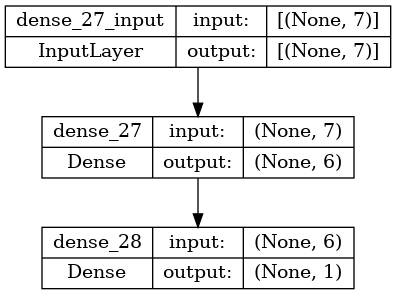

In [67]:
plot_model(r_model, show_shapes=True)

In [76]:
r_model.fit(x_train_processed, y_train, batch_size=32, epochs=3, workers=8, use_multiprocessing=True)

Epoch 1/3
6553/6553 [==============================] - 9s 1ms/step - loss: 0.5715 - accuracy: 0.7806
Epoch 2/3
6553/6553 [==============================] - 8s 1ms/step - loss: 0.5286 - accuracy: 0.8248
Epoch 3/3
6553/6553 [==============================] - 8s 1ms/step - loss: 0.5278 - accuracy: 0.8346


In [77]:
# L1 Regularizer
r_model = Sequential([Dense(6, input_dim=7, activation='relu', kernel_regularizer=L1(0.1)),\
                      Dense(1,activation='sigmoid', kernel_regularizer=L1(0.1))])
r_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [78]:
r_model.fit(x_train_processed, y_train, batch_size=32, epochs=2, workers=8, use_multiprocessing=True)

Epoch 1/2
6553/6553 [==============================] - 9s 1ms/step - loss: 0.6596 - accuracy: 0.7201
Epoch 2/2
6553/6553 [==============================] - 8s 1ms/step - loss: 0.5941 - accuracy: 0.7195


In [79]:
# L1 + L2 Regularization
r_model = Sequential([Dense(6, input_dim=7, activation='relu', kernel_regularizer=L1L2(3, 2)),\
                      Dense(1,activation='sigmoid', kernel_regularizer=L1L2(3, 2))])
r_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [80]:
r_model.fit(x_train_processed, y_train, batch_size=32, epochs=2, workers=8, use_multiprocessing=True)

Epoch 1/2
6553/6553 [==============================] - 9s 1ms/step - loss: 2.7561 - accuracy: 0.7227
Epoch 2/2
6553/6553 [==============================] - 8s 1ms/step - loss: 0.6109 - accuracy: 0.7195


## Noise Injection

In [15]:
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Activation

In [115]:
r_model = Sequential([Dense(6, input_dim=7, activation='relu'),GaussianNoise(0.1), \
                      Dense(1,activation='sigmoid', kernel_regularizer=L1L2(3, 2)), GaussianNoise(0.1)])
r_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [86]:
r_model.fit(x_train_processed, y_train, batch_size=32, epochs=2, workers=8, use_multiprocessing=True)

Epoch 1/2
6553/6553 [==============================] - 9s 1ms/step - loss: 1.1607 - accuracy: 0.6962
Epoch 2/2
6553/6553 [==============================] - 8s 1ms/step - loss: 0.6275 - accuracy: 0.7053


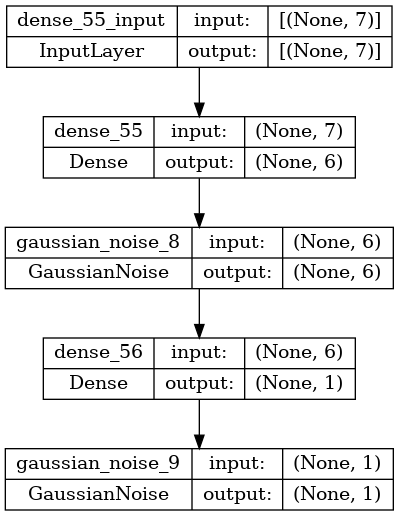

In [116]:
plot_model(r_model, show_shapes=True)

In [87]:
# One can Inject Noise Before Applying the Activation function as well
r_model = Sequential([Dense(6, input_dim=7),GaussianNoise(0.1), Activation('relu'),\
                      Dense(1), GaussianNoise(0.1),Activation('sigmoid')])
r_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [88]:
r_model.fit(x_train_processed, y_train, batch_size=32, epochs=2, workers=8, use_multiprocessing=True)

Epoch 1/2
6553/6553 [==============================] - 9s 1ms/step - loss: 0.1339 - accuracy: 0.9607
Epoch 2/2
6553/6553 [==============================] - 8s 1ms/step - loss: 0.0279 - accuracy: 0.9888


## Early Stopping

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
cb_earlystop = EarlyStopping(monitor='val_loss',
                            min_delta=0.01,\
                            patience=5,
                            verbose=1,
                            mode='auto',
                            restore_best_weights=True,
                            start_from_epoch=0)

In [92]:
r_model = Sequential([Dense(6, input_dim=7, activation='relu'),
                      Dense(1,activation='sigmoid')])
r_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [96]:
history = r_model.fit(x_train_processed, y_train, epochs=100, batch_size=100, workers=8, use_multiprocessing=True, 
            validation_data=[x_test_processed, y_test], callbacks=[cb_earlystop])

Epoch 1/100
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.0679 - val_accuracy: 0.9758
Epoch 2/100
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0287 - accuracy: 0.9930 - val_loss: 0.0779 - val_accuracy: 0.9774
Epoch 3/100
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0912 - val_accuracy: 0.9777
Epoch 4/100
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 0.0962 - val_accuracy: 0.9774
Epoch 5/100
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.1036 - val_accuracy: 0.9783
Epoch 6/100
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.1133 - val_accuracy: 0.9779
Epoch 6: early stopping


In [97]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

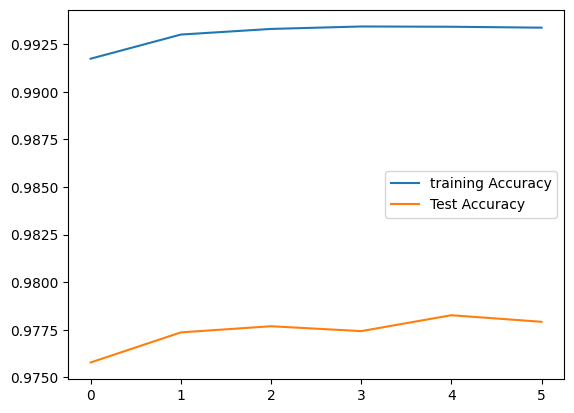

In [101]:
plt.plot(history.history['accuracy'], label='training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

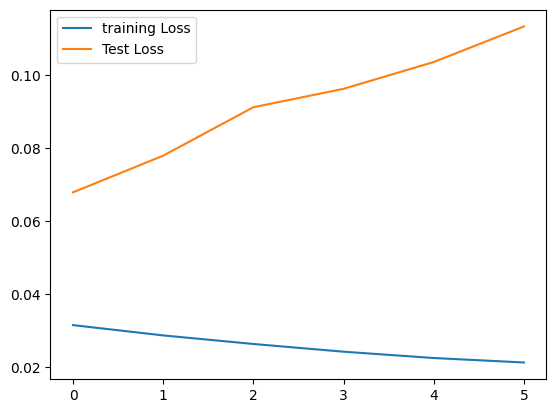

In [102]:
plt.plot(history.history['loss'], label='training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

In [105]:
rne_model = Sequential([Dense(100, input_dim=7, activation='relu'),
                      Dense(50,activation='relu'),Dense(1,activation='sigmoid')])
rne_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [111]:
history = rne_model.fit(x_train_processed, y_train, epochs=50, batch_size=100, workers=8, use_multiprocessing=True, 
            validation_data=[x_test_processed, y_test])

Epoch 1/50
2097/2097 [==============================] - 5s 2ms/step - loss: 0.0448 - accuracy: 0.9890 - val_loss: 0.1043 - val_accuracy: 0.9750
Epoch 2/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.0865 - val_accuracy: 0.9770
Epoch 3/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.1058 - val_accuracy: 0.9798
Epoch 4/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0155 - accuracy: 0.9957 - val_loss: 0.1348 - val_accuracy: 0.9736
Epoch 5/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0141 - accuracy: 0.9964 - val_loss: 0.1298 - val_accuracy: 0.9830
Epoch 6/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0123 - accuracy: 0.9968 - val_loss: 0.1266 - val_accuracy: 0.9859
Epoch 7/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.1349 - val_accuracy:

In [112]:
# with early stopping
history_es = rne_model.fit(x_train_processed, y_train, epochs=50, batch_size=100, workers=8, use_multiprocessing=True, 
            validation_data=[x_test_processed, y_test], callbacks=[cb_earlystop])

Epoch 1/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.5901 - val_accuracy: 0.9171
Epoch 2/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.3534 - val_accuracy: 0.9667
Epoch 3/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.3484 - val_accuracy: 0.9749
Epoch 4/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.2972 - val_accuracy: 0.9767
Epoch 5/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.3083 - val_accuracy: 0.9821
Epoch 6/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.2897 - val_accuracy: 0.9858
Epoch 7/50
2097/2097 [==============================] - 4s 2ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.6884 - val_accuracy:

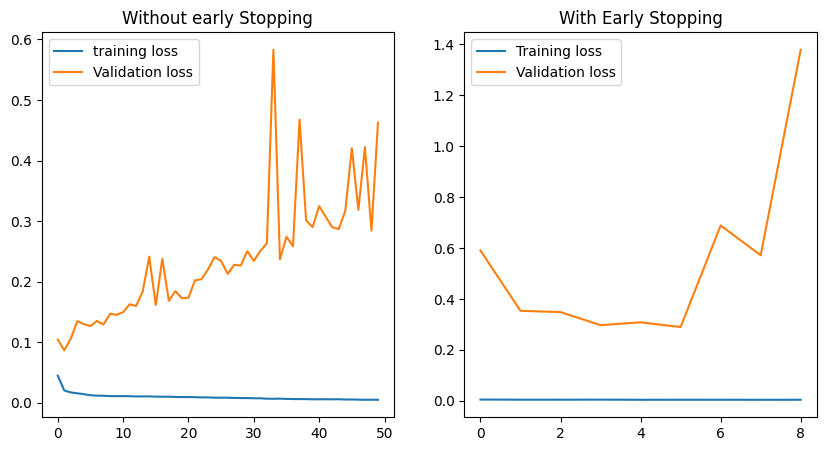

In [113]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("Without early Stopping")
plt.subplot(122)
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("With Early Stopping")
plt.show()

## Dropout

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import binary_crossentropy

In [19]:
dropout_model = Sequential()
dropout_model.add(Dense(10, input_dim=7, activation='elu'))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(8, activation='elu'))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(7, activation='elu'))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(5, activation='elu'))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(3, activation='elu'))
dropout_model.add(Dense(1, activation='sigmoid'))
dropout_model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

In [21]:
dropout_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 7)                 63        
                                                                 
 dropout_2 (Dropout)         (None, 7)                 0         
                                                                 
 dense_3 (Dense)             (None, 5)                 4

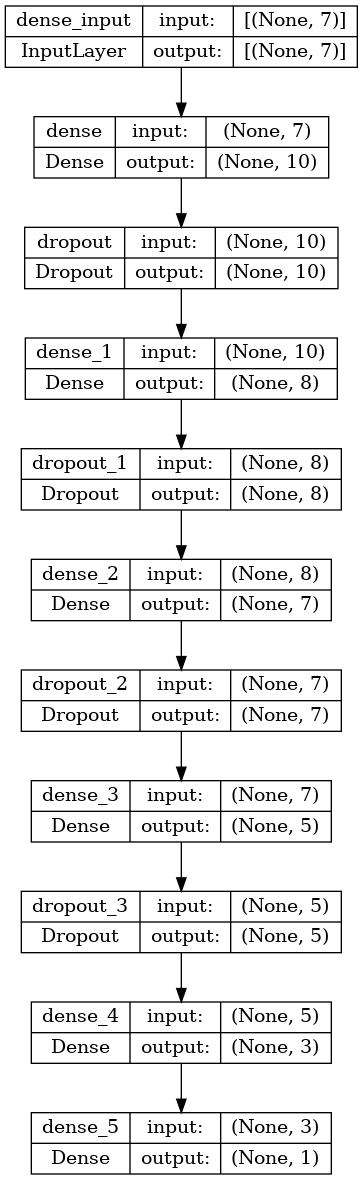

In [22]:
plot_model(dropout_model, show_shapes=True)

In [25]:
dropout_hist = dropout_model.fit(x_train_processed, y_train, batch_size=64, epochs=50, validation_data=[x_test_processed, y_test],
                 callbacks=[checkpoint_cb, cb_earlystop])

Epoch 1/50
3270/3277 [============================>.] - ETA: 0s - loss: 0.1038 - accuracy: 0.9693
Epoch 1: saving model to SavedModels/TaxiFare
3277/3277 [==============================] - 9s 2ms/step - loss: 0.1037 - accuracy: 0.9694 - val_loss: 0.0738 - val_accuracy: 0.9785
Epoch 2/50
3272/3277 [============================>.] - ETA: 0s - loss: 0.0508 - accuracy: 0.9814
Epoch 2: saving model to SavedModels/TaxiFare
3277/3277 [==============================] - 7s 2ms/step - loss: 0.0508 - accuracy: 0.9814 - val_loss: 0.0432 - val_accuracy: 0.9824
Epoch 3/50
3274/3277 [============================>.] - ETA: 0s - loss: 0.0357 - accuracy: 0.9895
Epoch 3: saving model to SavedModels/TaxiFare
3277/3277 [==============================] - 7s 2ms/step - loss: 0.0357 - accuracy: 0.9895 - val_loss: 0.0413 - val_accuracy: 0.9913
Epoch 4/50
3268/3277 [============================>.] - ETA: 0s - loss: 0.0299 - accuracy: 0.9913
Epoch 4: saving model to SavedModels/TaxiFare
3277/3277 [==============

In [26]:
dropout_model.evaluate(x_test_processed, y_test)

2809/2809 [==============================] - 3s 1ms/step - loss: 0.0432 - accuracy: 0.9824


[0.04317902401089668, 0.9823505282402039]

In [27]:
np.around(dropout_model.predict(x_test_processed)).astype('int')

2809/2809 [==============================] - 3s 981us/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

## Effect of Normalization on training

In [28]:
x_train # Not Normalized data

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare
0,748.0,2.75,1.0,75.00,24,6.300,105.300
1,1187.0,3.43,1.0,105.00,24,13.200,142.200
2,730.0,3.12,1.0,71.25,0,26.625,97.875
3,671.0,5.63,3.0,90.00,0,9.750,99.750
4,329.0,2.09,1.0,45.00,12,13.200,70.200
...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800
209669,438.0,1.29,1.0,48.75,12,34.575,95.325
209670,571.0,2.82,1.0,63.75,0,6.000,69.750
209671,491.0,2.16,1.0,56.25,0,13.500,69.750


In [29]:
# Lets use Dropout_model itself
# x_train => Unnormalized Data
history_nonormal = dropout_model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=[x_test, y_test], callbacks=[cb_earlystop])

Epoch 1/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.6228 - accuracy: 0.7175 - val_loss: 0.5951 - val_accuracy: 0.7177
Epoch 2/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.4323 - accuracy: 0.8078 - val_loss: 1.6913 - val_accuracy: 0.3000
Epoch 3/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.1708 - accuracy: 0.9465 - val_loss: 2.1414 - val_accuracy: 0.3317
Epoch 4/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.1323 - accuracy: 0.9570 - val_loss: 2.0953 - val_accuracy: 0.3586
Epoch 5/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.1045 - accuracy: 0.9659 - val_loss: 1.6268 - val_accuracy: 0.4981
Epoch 6/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.0922 - accuracy: 0.9714 - val_loss: 0.3563 - val_accuracy: 0.8651
Epoch 7/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.0846 - accuracy: 0.9744 - val_loss: 0.4220 - val_ac

In [30]:
history_normal = dropout_model.fit(x_train_processed, y_train, epochs=30, batch_size=32, validation_data=[x_test_processed, y_test], callbacks=[cb_earlystop])

Epoch 1/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.1086 - accuracy: 0.9620 - val_loss: 0.0372 - val_accuracy: 0.9933
Epoch 2/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.0384 - accuracy: 0.9890 - val_loss: 0.0383 - val_accuracy: 0.9936
Epoch 3/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.0338 - accuracy: 0.9903 - val_loss: 0.0461 - val_accuracy: 0.9933
Epoch 4/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.0319 - accuracy: 0.9909 - val_loss: 0.0636 - val_accuracy: 0.9927
Epoch 5/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.0303 - accuracy: 0.9911 - val_loss: 0.0882 - val_accuracy: 0.9917
Epoch 6/30
6553/6553 [==============================] - 13s 2ms/step - loss: 0.0301 - accuracy: 0.9919 - val_loss: 0.1061 - val_accuracy: 0.9915
Epoch 6: early stopping


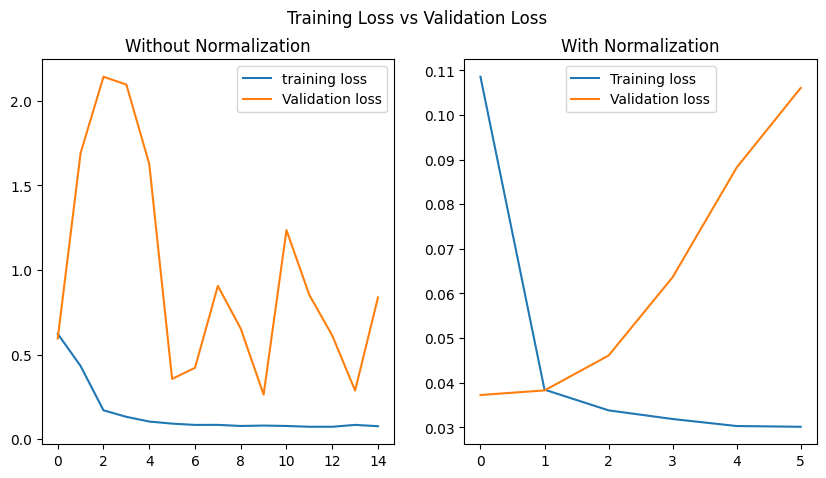

In [31]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history_nonormal.history['loss'], label='training loss')
plt.plot(history_nonormal.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("Without Normalization")
plt.subplot(122)
plt.plot(history_normal.history['loss'], label='Training loss')
plt.plot(history_normal.history['val_loss'], label='Validation loss')
plt.legend()
plt.title("With Normalization")
plt.suptitle("Training Loss vs Validation Loss")
plt.show()

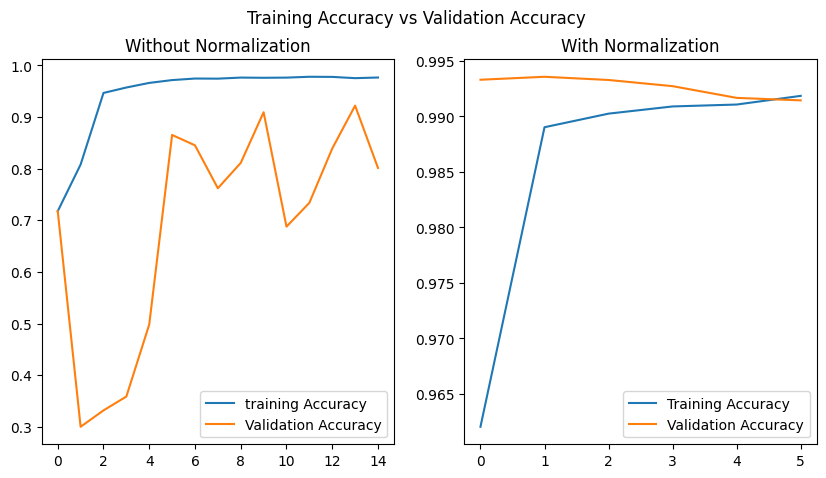

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history_nonormal.history['accuracy'], label='training Accuracy')
plt.plot(history_nonormal.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Without Normalization")
plt.subplot(122)
plt.plot(history_normal.history['accuracy'], label='Training Accuracy')
plt.plot(history_normal.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("With Normalization")
plt.suptitle("Training Accuracy vs Validation Accuracy")
plt.show()

##  Batch Normalization

In [19]:
from tensorflow.keras.layers import BatchNormalization

In [34]:
bn_model = Sequential([Dense(10, input_dim=7, activation='elu'),BatchNormalization(),
                      Dense(7, activation='relu'), BatchNormalization(),
                      Dense(4, activation='selu'), BatchNormalization(),
                      Dense(1, activation='sigmoid')])
bn_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [35]:
bn_model.fit(x_train_processed, y_train, epochs=3)

Epoch 1/3
6553/6553 [==============================] - 14s 2ms/step - loss: 0.0802 - accuracy: 0.9725
Epoch 2/3
6553/6553 [==============================] - 12s 2ms/step - loss: 0.0357 - accuracy: 0.9887
Epoch 3/3
6553/6553 [==============================] - 12s 2ms/step - loss: 0.0281 - accuracy: 0.9914


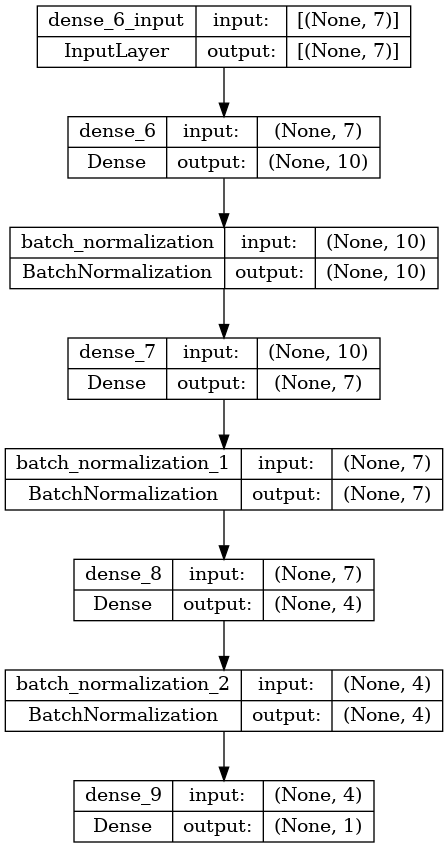

In [36]:
plot_model(bn_model, show_shapes=True)

## Weight Initialization

In [143]:
# kernel_initializer will help in initalizing the weights

In [37]:
bn_model = Sequential([Dense(10, input_dim=7, activation='elu', kernel_initializer='glorot_uniform'),
                      Dense(7, activation='relu', kernel_initializer='glorot_normal'),
                      Dense(4, activation='selu', kernel_initializer = 'he_normal'),
                      Dense(1, activation='sigmoid', kernel_initializer='he_uniform')])
bn_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [38]:
bn_model.fit(x_train_processed, y_train, epochs=3)

Epoch 1/3
6553/6553 [==============================] - 10s 1ms/step - loss: 0.0554 - accuracy: 0.9827
Epoch 2/3
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0211 - accuracy: 0.9935
Epoch 3/3
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0161 - accuracy: 0.9954


In [39]:
## Custom initializer
def custom_init(shape, dtype=None):
    return tf.random.normal(shape, stddev=0.5, dtype=dtype)

In [20]:
from tensorflow.keras import initializers

In [41]:
# Other Options, bias_initializer => initializes Bias
bn_model = Sequential([Dense(10, input_dim=7, activation='elu', kernel_initializer='random_normal'),
                      Dense(7, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05)),
                      Dense(4, activation='selu', kernel_initializer = initializers.RandomUniform(minval=-0.5, maxval=0.5),
                            bias_initializer='zeros'),
                      Dense(1, activation='sigmoid', kernel_initializer=custom_init)])
bn_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [42]:
bn_model.fit(x_train_processed, y_train, epochs=3)

Epoch 1/3
6553/6553 [==============================] - 10s 1ms/step - loss: 0.0452 - accuracy: 0.9851
Epoch 2/3
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 3/3
6553/6553 [==============================] - 9s 1ms/step - loss: 0.0221 - accuracy: 0.9930


## Optimizers

In [ ]:
## SGD, with moemntum, with Nosterov, Adagrad, RMSProp, Adam, Nadam, Adamax, NADAMAX

In [47]:
# SGD
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer='sgd', loss=binary_crossentropy, metrics=['accuracy'])

In [48]:
optimizer_model.fit(x_train_processed, y_train, epochs=3, validation_data=[x_test_processed, y_test])

Epoch 1/3
6553/6553 [==============================] - 12s 2ms/step - loss: 0.0820 - accuracy: 0.9707 - val_loss: 0.0536 - val_accuracy: 0.9751
Epoch 2/3
6553/6553 [==============================] - 11s 2ms/step - loss: 0.0369 - accuracy: 0.9872 - val_loss: 0.0532 - val_accuracy: 0.9747
Epoch 3/3
6553/6553 [==============================] - 11s 2ms/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.0461 - val_accuracy: 0.9769


In [49]:
# Adagrad
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer='adagrad', loss=binary_crossentropy, metrics=['accuracy'])

In [50]:
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 12s 2ms/step - loss: 0.4909 - accuracy: 0.9151 - val_loss: 0.5231 - val_accuracy: 0.9453


In [51]:
# AdaDelta
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer='adadelta', loss=binary_crossentropy, metrics=['accuracy'])

In [52]:
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 13s 2ms/step - loss: 0.5274 - accuracy: 0.7312 - val_loss: 0.4536 - val_accuracy: 0.8854


In [53]:
# RMSProp
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer='RMSprop', loss=binary_crossentropy, metrics=['accuracy'])

In [54]:
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 12s 2ms/step - loss: 0.0407 - accuracy: 0.9867 - val_loss: 0.1496 - val_accuracy: 0.9770


In [55]:
# Adam
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer='adam', loss=binary_crossentropy, metrics=['accuracy'])

In [56]:
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 13s 2ms/step - loss: 0.0515 - accuracy: 0.9807 - val_loss: 0.0388 - val_accuracy: 0.9900


In [57]:
# Nadam
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer='nadam', loss=binary_crossentropy, metrics=['accuracy'])

In [58]:
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 14s 2ms/step - loss: 0.0471 - accuracy: 0.9885 - val_loss: 0.0435 - val_accuracy: 0.9855


In [59]:
# ADAMAX
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer='adamax', loss=binary_crossentropy, metrics=['accuracy'])

In [60]:
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 12s 2ms/step - loss: 0.0855 - accuracy: 0.9636 - val_loss: 0.0764 - val_accuracy: 0.9737


In [61]:
# NADAMAX
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer='nadamax', loss=binary_crossentropy, metrics=['accuracy'])
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 13s 2ms/step - loss: 0.0717 - accuracy: 0.9754 - val_loss: 0.0312 - val_accuracy: 0.9917


In [21]:
# Changing Initial learning Rate for all Optimizisers
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop, Nadam

In [24]:
sgd_momentum = SGD(learning_rate=0.01, momentum=0.9) # SGD Momentum # Beta*Old_velocity+learningrate*gradient
sgd_nesterov = SGD(learning_rate=0.005, nesterov=True)
sgd_momentum2 = SGD(learning_rate=0.001, use_ema=True) # beta*old_velocity+(1-beta)*currentvalue
sgd_nesterov_momentum = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

In [23]:
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer=sgd_momentum, loss=binary_crossentropy, metrics=['accuracy'])
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 12s 2ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.0298 - val_accuracy: 0.9923


In [25]:
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer=sgd_nesterov, loss=binary_crossentropy, metrics=['accuracy'])
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 12s 2ms/step - loss: 0.0974 - accuracy: 0.9706 - val_loss: 0.0639 - val_accuracy: 0.9748


In [26]:
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer=sgd_momentum2, loss=binary_crossentropy, metrics=['accuracy'])
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 12s 2ms/step - loss: 0.3001 - accuracy: 0.8549 - val_loss: 0.1288 - val_accuracy: 0.9757


In [27]:
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer=sgd_nesterov_momentum, loss=binary_crossentropy, metrics=['accuracy'])
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 12s 2ms/step - loss: 0.0307 - accuracy: 0.9895 - val_loss: 0.0676 - val_accuracy: 0.9866


In [28]:
adam = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer=adam, loss=binary_crossentropy, metrics=['accuracy'])
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 13s 2ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0280 - val_accuracy: 0.9933


In [30]:
rms_prop = RMSprop(learning_rate=0.01)
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer=rms_prop, loss=binary_crossentropy, metrics=['accuracy'])
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 12s 2ms/step - loss: 0.0244 - accuracy: 0.9930 - val_loss: 0.1024 - val_accuracy: 0.9827


In [31]:
# AdaGrad
adagrad = Adagrad(learning_rate=0.01)
optimizer_model = Sequential([Dense(10, input_dim=7, activation='elu'),
                      Dense(7, activation='relu'),
                      Dense(4, activation='selu'),
                      Dense(1, activation='sigmoid')])
optimizer_model.compile(optimizer=adagrad, loss=binary_crossentropy, metrics=['accuracy'])
optimizer_model.fit(x_train_processed, y_train, epochs=1, validation_data=[x_test_processed, y_test])

6553/6553 [==============================] - 12s 2ms/step - loss: 0.0788 - accuracy: 0.9748 - val_loss: 0.1044 - val_accuracy: 0.9788


## Loss Functions and Metrics

In [5]:
from sklearn.datasets import make_classification, make_regression

In [6]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MeanSquaredError, MeanAbsoluteError,Huber
from tensorflow.keras.losses import CategoricalHinge, MeanSquaredLogarithmicError, MeanAbsolutePercentageError
from tensorflow.keras.losses import CategoricalCrossentropy # Sparse version is faster, both are same. 

In [7]:
multiclass_x, multiclass_y = make_classification(n_samples=100000, n_features=20, n_classes=5, n_informative=8)
regress_x, regress_y = make_regression(n_samples=100000,n_features=40, noise=5)

In [63]:
## Multi Class Classification 
multi_class_model = Sequential([Dense(18, input_dim=20, activation='relu'),
                               Dense(10, activation='selu'),
                               Dense(5, activation='softmax')])
multi_class_model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [64]:
multi_class_model.fit(multiclass_x, multiclass_y, validation_split=0.3, epochs=30)

Epoch 1/30
2188/2188 [==============================] - 4s 2ms/step - loss: 0.8351 - accuracy: 0.6887 - val_loss: 0.5776 - val_accuracy: 0.7942
Epoch 2/30
2188/2188 [==============================] - 4s 2ms/step - loss: 0.5100 - accuracy: 0.8205 - val_loss: 0.4702 - val_accuracy: 0.8388
Epoch 3/30
2188/2188 [==============================] - 4s 2ms/step - loss: 0.4478 - accuracy: 0.8444 - val_loss: 0.4418 - val_accuracy: 0.8490
Epoch 4/30
2188/2188 [==============================] - 4s 2ms/step - loss: 0.4204 - accuracy: 0.8569 - val_loss: 0.4166 - val_accuracy: 0.8612
Epoch 5/30
2188/2188 [==============================] - 4s 2ms/step - loss: 0.4047 - accuracy: 0.8627 - val_loss: 0.4075 - val_accuracy: 0.8650
Epoch 6/30
2188/2188 [==============================] - 4s 2ms/step - loss: 0.3942 - accuracy: 0.8679 - val_loss: 0.3927 - val_accuracy: 0.8712
Epoch 7/30
2188/2188 [==============================] - 4s 2ms/step - loss: 0.3847 - accuracy: 0.8719 - val_loss: 0.3846 - val_accuracy:

In [77]:
regression_model = Sequential([Dense(30, input_dim=40, activation='relu'),
                               Dense(10, activation='relu'),
                               Dense(1, activation='linear')])
regression_model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['MeanAbsolutePercentageError'])

In [78]:
regression_model.fit(regress_x, regress_y, validation_split=0.3, epochs=30)

Epoch 1/30
2188/2188 [==============================] - 4s 2ms/step - loss: 6593.7471 - mean_absolute_percentage_error: 86.5181 - val_loss: 197.5602 - val_mean_absolute_percentage_error: 50.2213
Epoch 2/30
2188/2188 [==============================] - 4s 2ms/step - loss: 120.9952 - mean_absolute_percentage_error: 36.8463 - val_loss: 66.0399 - val_mean_absolute_percentage_error: 35.1476
Epoch 3/30
2188/2188 [==============================] - 4s 2ms/step - loss: 46.7546 - mean_absolute_percentage_error: 29.5376 - val_loss: 37.9654 - val_mean_absolute_percentage_error: 25.3497
Epoch 4/30
2188/2188 [==============================] - 4s 2ms/step - loss: 33.7745 - mean_absolute_percentage_error: 25.5708 - val_loss: 31.9017 - val_mean_absolute_percentage_error: 23.3038
Epoch 5/30
2188/2188 [==============================] - 4s 2ms/step - loss: 30.1775 - mean_absolute_percentage_error: 22.8706 - val_loss: 29.9244 - val_mean_absolute_percentage_error: 30.3750
Epoch 6/30
2188/2188 [==============

## TensorBoard

In [8]:
from tensorflow.keras.callbacks import TensorBoard

In [9]:
tensorboard = TensorBoard(log_dir="logs/", histogram_freq=1)
cp_model_check = ModelCheckpoint(filepath="chkpoint/model")

In [10]:
multi_class_model = Sequential([Dense(18, input_dim=20, activation='relu'),
                               Dense(10, activation='relu'),
                               Dense(5, activation='softmax')])
multi_class_model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [12]:
multi_class_model.fit(multiclass_x, multiclass_y, epochs=5, callbacks=[tensorboard, cp_model_check])

Epoch 1/5
3110/3125 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.8329

INFO:tensorflow:Assets written to: chkpoint\model\assets


INFO:tensorflow:Assets written to: chkpoint\model\assets


3125/3125 [==============================] - 18s 6ms/step - loss: 0.4858 - accuracy: 0.8330
Epoch 2/5
3108/3125 [============================>.] - ETA: 0s - loss: 0.4649 - accuracy: 0.8415

INFO:tensorflow:Assets written to: chkpoint\model\assets


INFO:tensorflow:Assets written to: chkpoint\model\assets


3125/3125 [==============================] - 15s 5ms/step - loss: 0.4645 - accuracy: 0.8417
Epoch 3/5
3118/3125 [============================>.] - ETA: 0s - loss: 0.4425 - accuracy: 0.8501

INFO:tensorflow:Assets written to: chkpoint\model\assets


INFO:tensorflow:Assets written to: chkpoint\model\assets


3125/3125 [==============================] - 17s 5ms/step - loss: 0.4428 - accuracy: 0.8500
Epoch 4/5
3125/3125 [==============================] - ETA: 0s - loss: 0.4199 - accuracy: 0.8573

INFO:tensorflow:Assets written to: chkpoint\model\assets


INFO:tensorflow:Assets written to: chkpoint\model\assets


3125/3125 [==============================] - 18s 6ms/step - loss: 0.4199 - accuracy: 0.8573
Epoch 5/5
3116/3125 [============================>.] - ETA: 0s - loss: 0.4002 - accuracy: 0.8647

INFO:tensorflow:Assets written to: chkpoint\model\assets


INFO:tensorflow:Assets written to: chkpoint\model\assets


3125/3125 [==============================] - 17s 6ms/step - loss: 0.4003 - accuracy: 0.8647


In [20]:
# layer wise Weights
# get_weights(layer)
multi_class_model.get_weights()[0]

IndexError: list index out of range

In [22]:
#multi_class_model.get_layer('name')

In [100]:
## Tensorboard
%load_ext tensorboard
%tensorboard --logdir logs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [24]:
# Hyper Parameter Tuning
!pip install keras-tuner

     ---------------------------------------- 0.0/176.1 kB ? eta -:--:--
     -------------------------- ----------- 122.9/176.1 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 176.1/176.1 kB 3.5 MB/s eta 0:00:00


## Hyper Parameter Tuning

In [26]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0%|                                               | 0.00/8.91k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 8.91k/8.91k [00:00<00:00, 26.3MB/s]


In [27]:
!unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [29]:
diabetes = pd.read_csv("diabetes.csv")

In [30]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [32]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [33]:
x_diabetes = diabetes.drop(['Outcome'], axis=1)
y_diabetes = diabetes['Outcome']

In [34]:
x_diabetes_train, x_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(x_diabetes, y_diabetes, test_size=0.3, random_state=27)

In [35]:
sc_dia = StandardScaler()
x_diabetes_train_p = sc_dia.fit_transform(x_diabetes_train)
x_diabetes_test_p = sc_dia.transform(x_diabetes_test)

In [41]:
from tensorflow.keras.metrics import Precision, Recall

In [59]:
## First Lets Try a Model
diab_model = Sequential([Dense(5, input_dim=8, activation='elu'),
                        Dense(3, input_dim=5, activation='relu'),
                        Dense(1, activation='sigmoid')])
diab_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(),Recall()])

In [60]:
diab_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 45        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [61]:
diab_model.fit(x_diabetes_train_p, y_diabetes_train, epochs=30, batch_size=32,validation_data=[x_diabetes_test_p, y_diabetes_test])

Epoch 1/30
17/17 [==============================] - 1s 18ms/step - loss: 0.8813 - accuracy: 0.4078 - precision_1: 0.3359 - recall_1: 0.6984 - val_loss: 0.8371 - val_accuracy: 0.4459 - val_precision_1: 0.3550 - val_recall_1: 0.7595
Epoch 2/30
17/17 [==============================] - 0s 4ms/step - loss: 0.8359 - accuracy: 0.4302 - precision_1: 0.3473 - recall_1: 0.7037 - val_loss: 0.7947 - val_accuracy: 0.4632 - val_precision_1: 0.3602 - val_recall_1: 0.7342
Epoch 3/30
17/17 [==============================] - 0s 4ms/step - loss: 0.7975 - accuracy: 0.4655 - precision_1: 0.3646 - recall_1: 0.6984 - val_loss: 0.7611 - val_accuracy: 0.5108 - val_precision_1: 0.3851 - val_recall_1: 0.7215
Epoch 4/30
17/17 [==============================] - 0s 4ms/step - loss: 0.7692 - accuracy: 0.4786 - precision_1: 0.3681 - recall_1: 0.6720 - val_loss: 0.7345 - val_accuracy: 0.5325 - val_precision_1: 0.3972 - val_recall_1: 0.7089
Epoch 5/30
17/17 [==============================] - 0s 4ms/step - loss: 0.7442 

## Took small datasets to do tuning Quickly
1. Optimizer selection
2. no of neurons in each layer, number of layers
3. Activation function

In [27]:
import kerastuner as kt

In [64]:
# Optimizer Selection
def build_model(hp):
    model = Sequential([Dense(5, input_dim=8, activation='elu'),
                        Dense(3, activation='relu'),
                        Dense(1, activation='sigmoid')])
    optimizer = hp.Choice('Optimizer',values = ['adam','RMSprop','adagrad','sgd'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [88]:
# Random Search
random_tuner = kt.RandomSearch(build_model, 
                              objective='val_accuracy',
                              max_trials=5,
                              directory='diabetes_model',
                              project_name = "diab_tuner")

In [89]:
random_tuner.search(x_diabetes_train_p, y_diabetes_train, epochs=100, validation_data=[x_diabetes_test_p, y_diabetes_test],\
                   callbacks=[cb_earlystop], verbose=2)

Trial 4 Complete [00h 00m 03s]
val_accuracy: 0.6580086350440979

Best val_accuracy So Far: 0.7748917937278748
Total elapsed time: 00h 00m 10s
INFO:tensorflow:Oracle triggered exit


In [68]:
random_tuner.search_space_summary()

Search space summary
Default search space size: 1
Optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'RMSprop', 'adagrad', 'sgd'], 'ordered': False}


In [71]:
random_tuner.get_best_hyperparameters()[0].values

{'Optimizer': 'adam'}

In [25]:
# Optimizer Selection, Number of Neurons in Each Layer
def build_model(hp):
    units1 = hp.Int("No_units1", min_value=2,max_value=10,step=3)
    units2 = hp.Int("No_units2", min_value=2, max_value=8, step=3)
    model = Sequential([Dense(units1, input_dim=8, activation='elu'),
                        Dense(units2, activation='relu'),
                        Dense(1, activation='sigmoid')])
    optimizer = hp.Choice('Optimizer',values = ['adam','RMSprop','adagrad','sgd'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [28]:
# Grid Search
grid_tuner = kt.GridSearch(build_model, 
                              objective='val_accuracy',
                              directory='diabetes_model',
                              project_name = "diab_tuner_grid0")

In [129]:
grid_tuner.search(x_diabetes_train_p, y_diabetes_train, epochs=100, validation_data=[x_diabetes_test_p, y_diabetes_test],\
                   callbacks=[cb_earlystop], verbose=2)

Trial 36 Complete [00h 00m 03s]
val_accuracy: 0.7705627679824829

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 01m 44s
INFO:tensorflow:Oracle triggered exit


In [29]:
grid_tuner.search_space_summary()

Search space summary
Default search space size: 3
No_units1 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 3, 'sampling': 'linear'}
No_units2 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 8, 'step': 3, 'sampling': 'linear'}
Optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'RMSprop', 'adagrad', 'sgd'], 'ordered': False}


In [96]:
grid_tuner.get_best_hyperparameters()[0].values

{'No_units': 8, 'Optimizer': 'sgd'}

In [107]:
import os
os.listdir("diabetes_model")

['diab_tuner', 'diab_tuner_grid']

In [108]:
os.listdir("diabetes_model/diab_tuner")

['trial_0', 'trial_3', 'oracle.json', 'trial_1', 'tuner0.json', 'trial_2']

In [110]:
os.listdir("diabetes_model/diab_tuner/trial_0")

['checkpoint.data-00000-of-00001',
 'trial.json',
 'checkpoint.index',
 'checkpoint']

In [117]:
trial = pd.read_json("diabetes_model/diab_tuner/trial_0/trial.json")

In [118]:
trial

,trial_id,hyperparameters,metrics,score,best_step,status,message
space,0,"[{'class_name': 'Choice', 'config': {'name': '...",NaN,0.670996,7,COMPLETED,NaN
values,0,{'Optimizer': 'RMSprop'},NaN,0.670996,7,COMPLETED,NaN
metrics,0,NaN,"{'loss': {'direction': 'min', 'observations': ...",0.670996,7,COMPLETED,NaN


In [144]:
# Optimizer Selection, Number of Neurons in Each Layer, number of Layers
def build_model(hp):
    model =Sequential()
    act = hp.Choice('Intial_Act', ['relu','selu','elu','softplus'])
    model.add(Dense(hp.Int("First_Hidden", min_value=1, max_value=10, step=3), input_dim=8, activation=act))
    for i in range(hp.Int("Num_Layers", min_value=0, max_value=10, step=1)):
        model.add(Dense(hp.Int("units_"+str(i), min_value=2, max_value=8,step=1), 
                              activation=hp.Choice("Activation_"+str(i),
                                                   values=['relu','selu','elu','softplus'])))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = hp.Choice('Optimizer',values = ['adam','RMSprop','adagrad','sgd'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [145]:
random_tuner = kt.RandomSearch(build_model, 
                              objective='val_accuracy',
                              max_trials=10,
                              directory='diabetes_model',
                              project_name = "diab_tuner_all")

INFO:tensorflow:Reloading Tuner from diabetes_model/diab_tuner_all/tuner0.json


In [146]:
random_tuner.search(x_diabetes_train_p, y_diabetes_train, epochs=100, validation_data=[x_diabetes_test_p, y_diabetes_test],\
                   callbacks=[cb_earlystop], verbose=2)

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.6969696879386902

Best val_accuracy So Far: 0.761904776096344
Total elapsed time: 00h 00m 22s
INFO:tensorflow:Oracle triggered exit


In [147]:
random_tuner.search_space_summary()

Search space summary
Default search space size: 16
Intial_Act (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'relu', 'softplus'], 'ordered': False}
First_Hidden (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 3, 'sampling': 'linear'}
Num_Layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
Optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'RMSprop', 'adagrad', 'sgd'], 'ordered': False}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 8, 'step': 1, 'sampling': 'linear'}
Activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'relu', 'softplus'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 8, 'step': 1, 'sampling': 'linear'}
Activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'relu', 'softplus'

In [148]:
random_tuner.get_best_hyperparameters()[0].values

{'Intial_Act': 'relu',
 'First_Hidden': 7,
 'Num_Layers': 1,
 'Optimizer': 'adam',
 'units_0': 3,
 'Activation_0': 'relu'}

In [155]:
random_tuner.get_best_models()[0].evaluate(x_diabetes_test_p, y_diabetes_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7619


[0.5888029932975769, 0.761904776096344]